In [1]:
!pip install kaggle
!kaggle datasets download -d janiobachmann/math-students
!unzip math-students.zip

Dataset URL: https://www.kaggle.com/datasets/janiobachmann/math-students
License(s): CC0-1.0
  0% 0.00/7.16k [00:00<?, ?B/s]
100% 7.16k/7.16k [00:00<00:00, 9.94MB/s]
Archive:  math-students.zip
  inflating: student-mat.csv         


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('/content/student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


###1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
###2 sex - student's sex (binary: 'F' - female or 'M' - male)
###3 age - student's age (numeric: from 15 to 22)
###4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
###5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
###6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
###7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 5th to 9th grade, 3 secondary education or 4 higher education)
###8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
###9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
###0 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
###11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
###12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
###13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
###14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
###15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
###16 schoolsup - extra educational support (binary: yes or no)
###17 famsup - family educational support (binary: yes or no)
###18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
###19 activities - extra-curricular activities (binary: yes or no)
###20 nursery - attended nursery school (binary: yes or no)
###21 higher - wants to take higher education (binary: yes or no)
###22 internet - Internet access at home (binary: yes or no)
###23 romantic - with a romantic relationship (binary: yes or no)
###24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
###25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
###26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
###27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
###28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
###29 health - current health status (numeric: from 1 - very bad to 5 - very good)
###30 absences - number of school absences (numeric: from 0 to 93)
###31 G - Grade (numeric: from 0 to 20)

#1 Dataset-ի լինքը՝ https://www.kaggle.com/datasets/janiobachmann/math-students/data
Բազան պարունակում է ավել քան 5 քանակական փոփոխական և 395 տող



#2 Տվյալների հիմնական հատկանիշները։
- Սեռը՝ Արական կամ Իգական:
- Տարիքը: Ուսանողների տարիքը:
- Ծնողների կրթական մակարդակ։
- Խնամակալ. Ում հետ է ապրում ուսանողը (մայր, հայր կամ այլ):
- Ուսման ժամանակը. Շաբաթական ուսմանը տրամադրվող ժամ:
- Գնահատականներ. dataset-ը ապահովում է երեք գնահատական ​​(G1, G2, G3) յուրաքանչյուր ուսանողի համար, որոնք համապատասխանաբար առաջին, երկրորդ և վերջին շրջանների գնահատականներն են:
- Բացակայություններ. բացակայությունների թիվը:
- Ինտերնետ հասանելիություն. արդյոք ուսանողը ունի ինտերնետ հասանելիություն տանը:
- Առողջական վիճակ. ուսանողի ներկայիս առողջական վիճակը:

1. Բազան պարունակում է տարբեր հատկանիշներ, ինչպիսիք են տարիքը, սեռը, ծնողների կրթությունը, ուսմանը տրամադրվող ժամանակը, անհաջողությունները, ալկոհոլի օգտագործումը և վերջնական գնահատականները:
2. Վերջնական գնահատականները կարող են ծառայել որպես բացատրվող փոփոխական ռեգրեսիայի խնդրում:
3. Այս տվյալների բազայի վիճակագրական վերլուծությունը կարող է պատկերացում կազմել ուսանողների կատարողականի դինամիկայի վերաբերյալ: Բացի այդ, տվյալների մեջ փոխկապակցվածության և օրինաչափությունների ուսումնասիրությունը կարող է արժեքավոր պատկերացումների բերել, թե ինչն է ազդում ուսանողի արդյունավետության վրա:

0      1
1      0
2      1
3      0
4      0
      ..
390    0
391    0
392    0
393    0
394    0
Name: schoolsup, Length: 395, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
df.shape

(395, 33)

In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df[col].value_counts())


Column Name: school
school
GP    349
MS     46
Name: count, dtype: int64

Column Name: sex
sex
F    208
M    187
Name: count, dtype: int64

Column Name: address
address
U    307
R     88
Name: count, dtype: int64

Column Name: famsize
famsize
GT3    281
LE3    114
Name: count, dtype: int64

Column Name: Pstatus
Pstatus
T    354
A     41
Name: count, dtype: int64

Column Name: Mjob
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

Column Name: Fjob
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64

Column Name: reason
reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64

Column Name: guardian
guardian
mother    273
father     90
other      32
Name: count, dtype: int64

Column Name: schoolsup
schoolsup
no     344
yes     51
Name: count, dtype: int64

Column Name: famsup
famsup
yes    242
no     153
Name: count, dty

#Visualization

In [4]:
df = df[~df['G3'].isin([0, 1])]

In [5]:
df = df.rename(columns={'G3': 'Grade'})
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


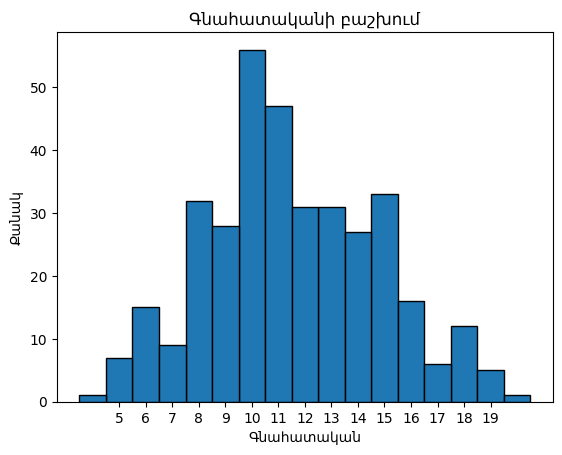

In [ ]:
plt.bar(df['Grade'].value_counts().index,
        df['Grade'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Գնահատական'); plt.ylabel('Քանակ'); plt.title('Գնահատականի բաշխում');
plt.xticks(list(range(5, 20)));

Text(0.5, 1.0, 'Գնահատականի խտությունը ըստ հասցեի')

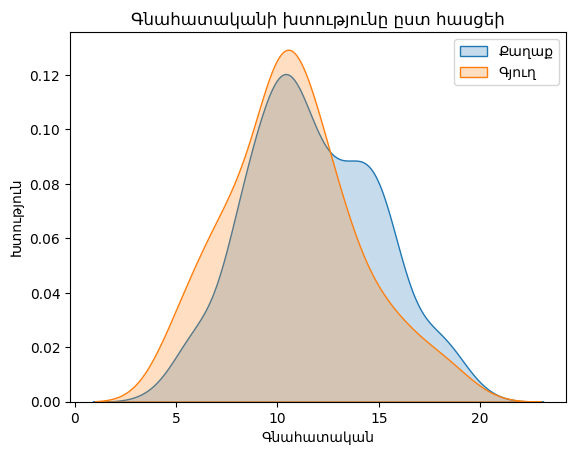

In [ ]:
#  Գնահատականի բաշխումն ըստ հասցեի
sns.kdeplot(df.loc[df['address'] == 'U', 'Grade'], label = 'Քաղաք', fill = True)
sns.kdeplot(df.loc[df['address'] == 'R', 'Grade'], label = 'Գյուղ', fill = True)
plt.legend()
plt.xlabel('Գնահատական'); plt.ylabel('Խտություն'); plt.title('Գնահատականի խտությունը ըստ հասցեի')

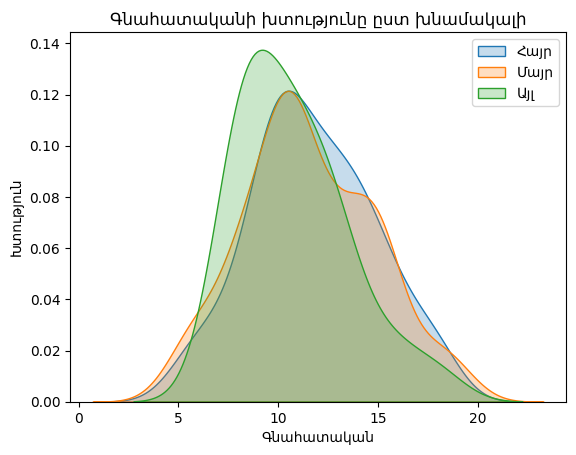

In [ ]:
sns.kdeplot(df.loc[df['guardian'] == 'father', 'Grade'], label = 'Հայր', fill = True)
sns.kdeplot(df.loc[df['guardian'] == 'mother', 'Grade'], label = 'Մայր', fill = True)
sns.kdeplot(df.loc[df['guardian'] == 'other', 'Grade'], label = 'Այլ', fill = True)
plt.legend()
plt.xlabel('Գնահատական'); plt.ylabel('Խտություն'); plt.title('Գնահատականի խտությունը ըստ խնամակալի');

In [ ]:
schools = df.groupby(['school'])['address'].value_counts()
schools

school  address
GP      U          259
        R           56
MS      R           22
        U           20
Name: count, dtype: int64

<ipython-input-26-fb3df8e7bbc0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medu',y='Grade',data=df,palette='rainbow')


<Axes: xlabel='Medu', ylabel='Grade'>

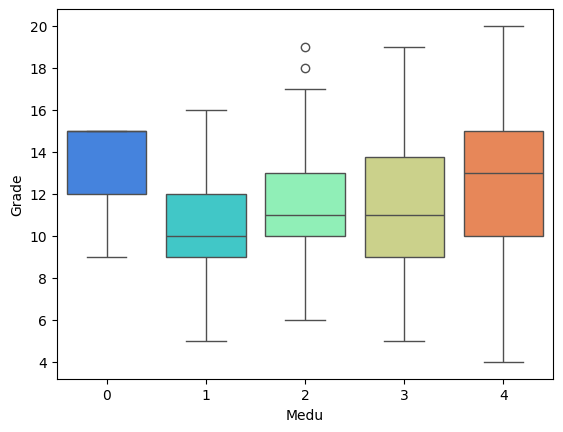

In [ ]:
sns.boxplot(x='Medu',y='Grade',data=df,palette='rainbow')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


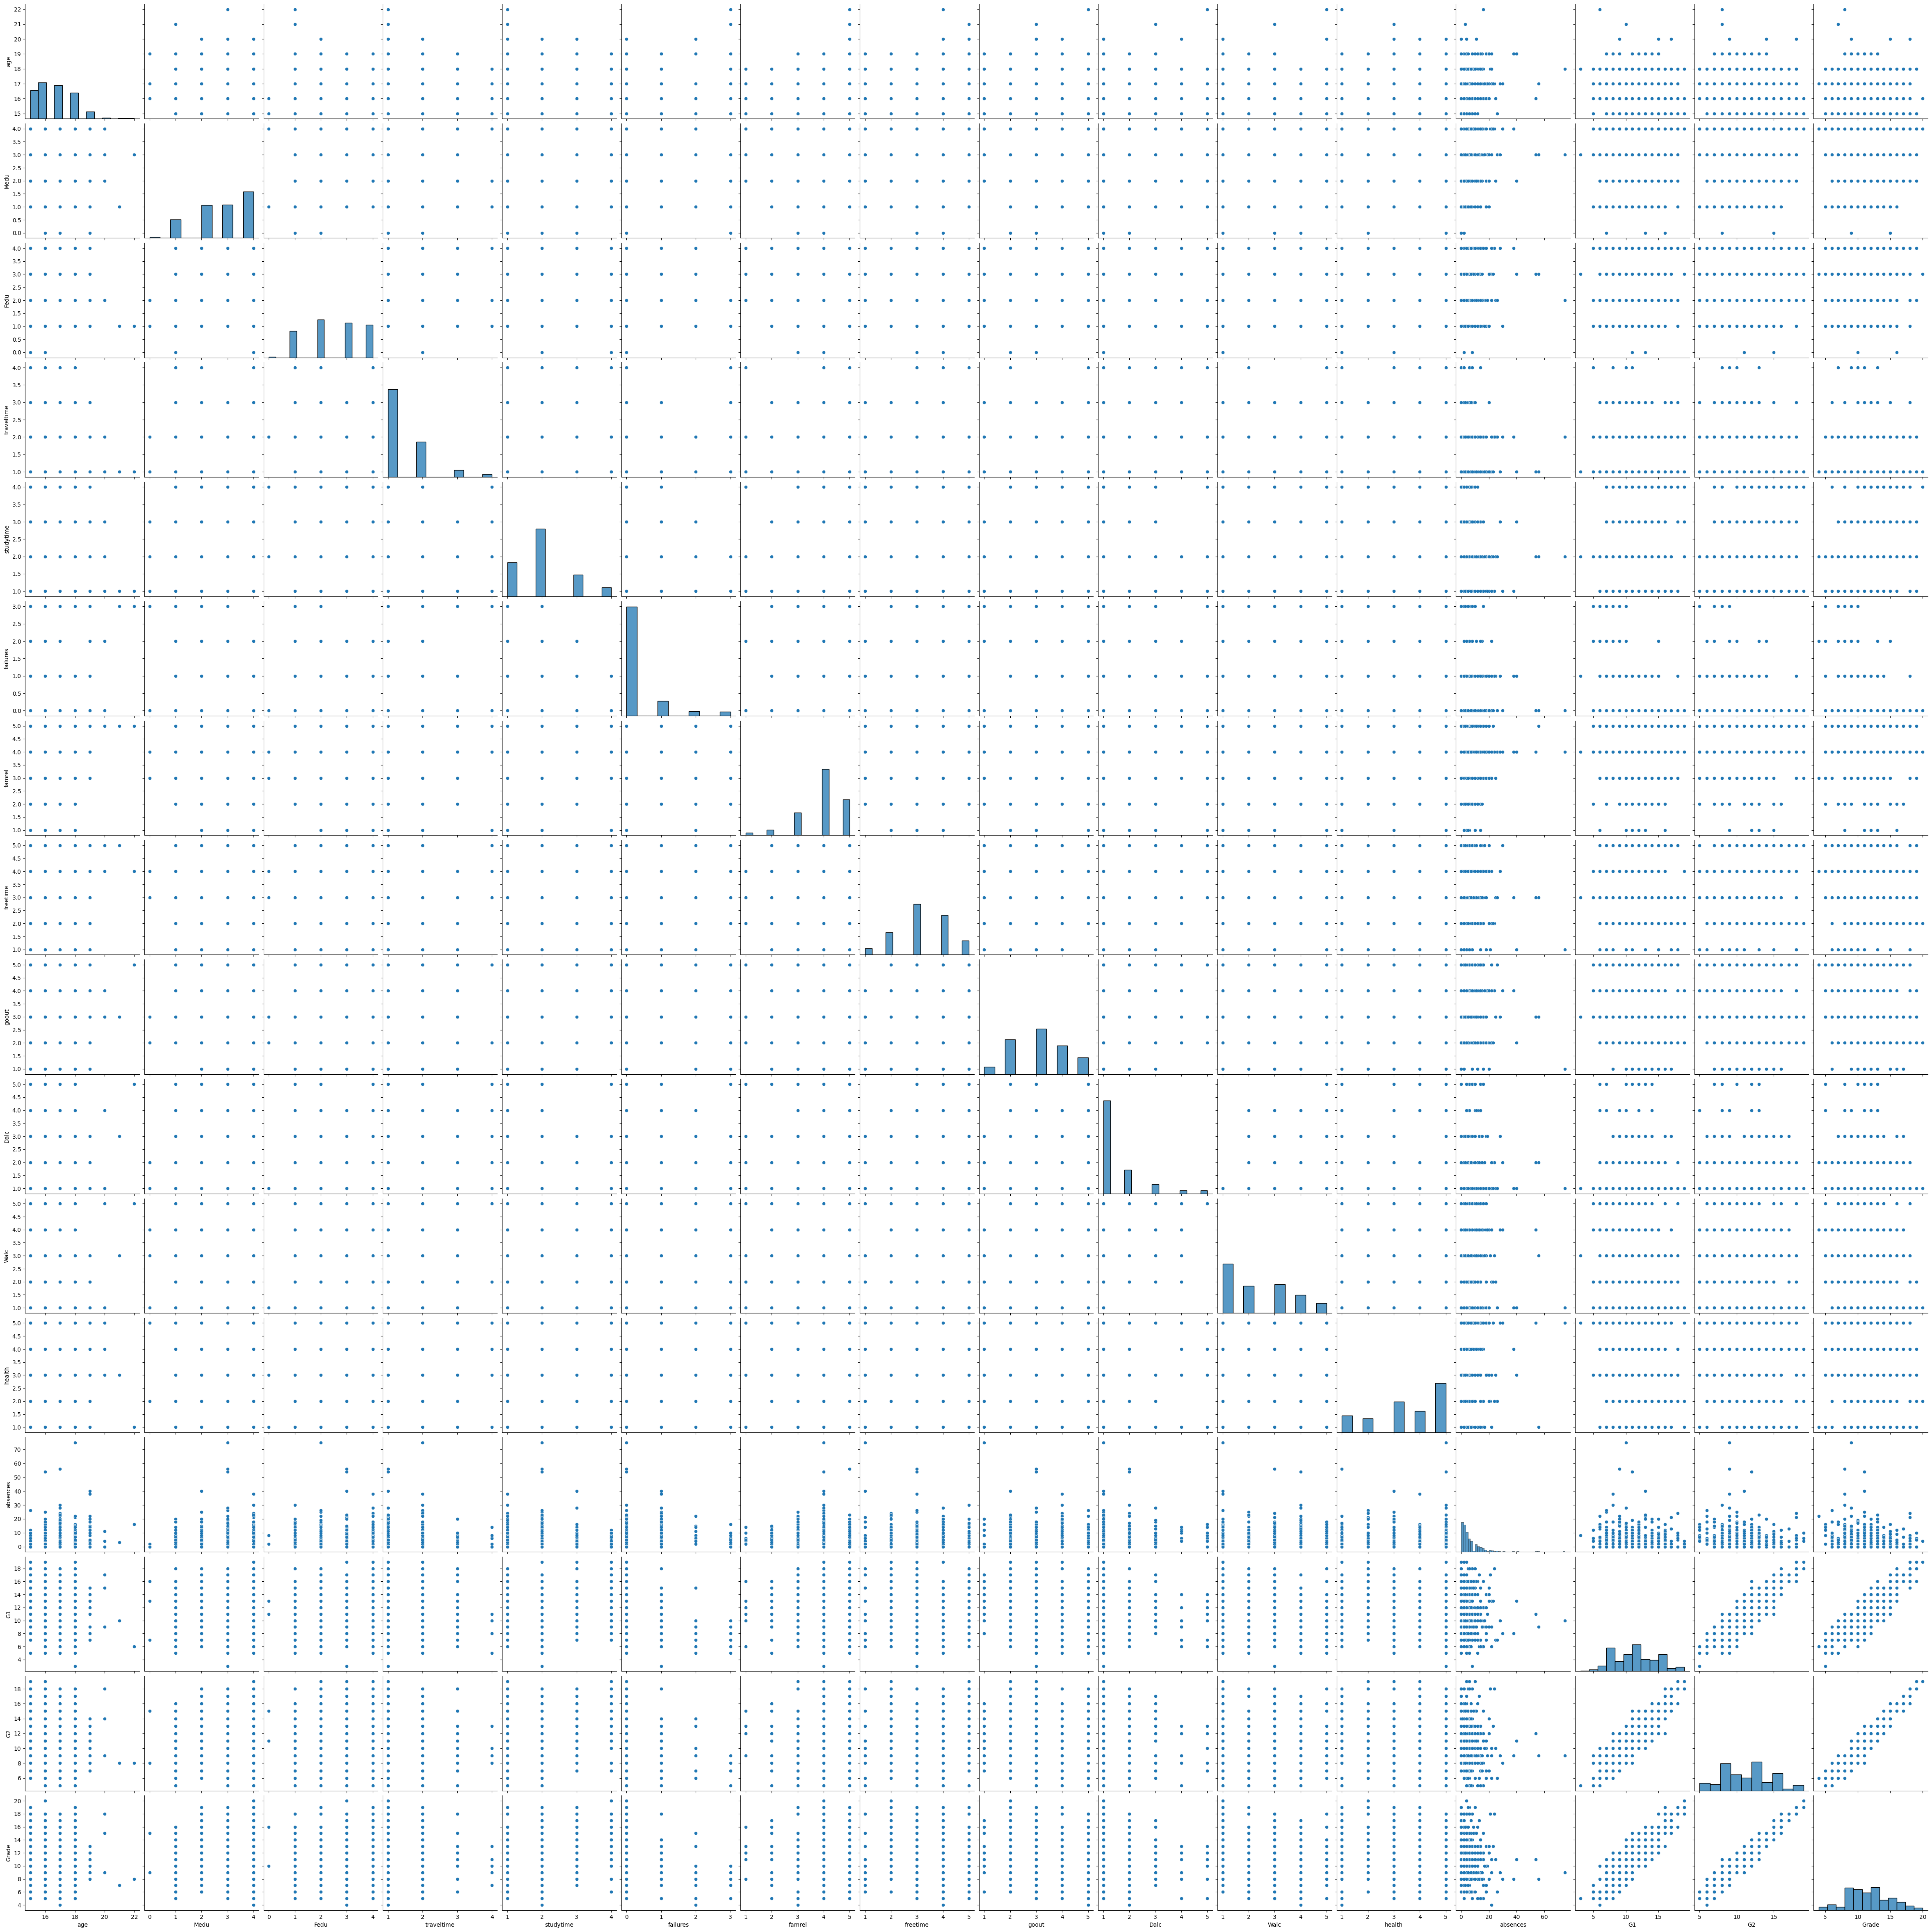

In [ ]:
sns.pairplot(df,size=3)

#5 Ես ընտրում եմ Grade, որպես բացատրվող փոփոխական ռեգրեսիայի խնդրում։
1. Վերջնական գնահատականը (Grade) դասընթացում ուսանողի ընդհանուր կատարողականի վճռորոշ ցուցանիշն է:
2. Վերլուծելով վերջնական գնահատականի վրա ազդող գործոնները, մենք կարող ենք պատկերացում կազմել այն մասին, թե որն է առավելապես նպաստում աշակերտի առաջադիմության վրա:
3. Ուսանողների վերջնական գնահատականների կանխատեսումը կարող է օգնել վաղ շրջանում միջամտել, որպեսզի բարելավել նրա ցոիցանիշները։

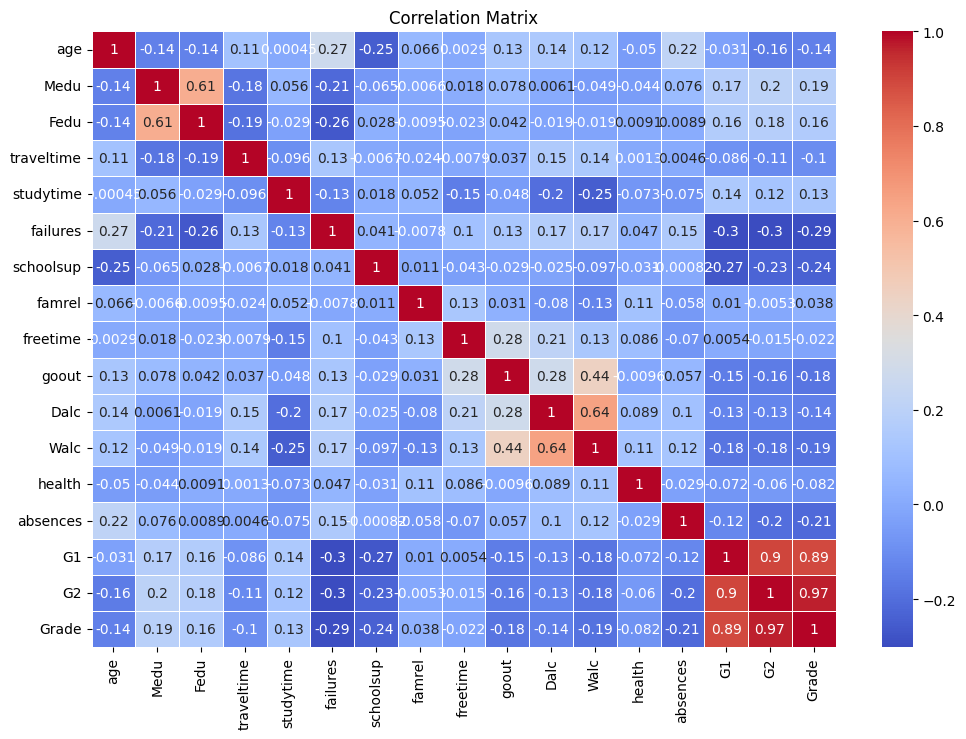

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [6]:
def format_data(df):

    # Targets are final grade of student
    labels = df['Grade']

    # Drop the school and the grades from features
    df = df.drop(columns=['school', 'G1', 'G2'])

    # Find correlations with the Grade
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    most_correlated = df[numeric_cols].corr().abs()['Grade'].sort_values(ascending=False)
    # Maintain the top 6 most correlation features with Grade
    most_correlated = most_correlated[1:7]
    print(most_correlated)

    df1 = pd.get_dummies(df)
    df = df.loc[:, most_correlated.index]

    # dummy variables
    df['sex_M'] = df1['sex_M']
    df['higher_yes'] = df1['higher_yes']
    df['schoolsup_yes'] = df1['schoolsup_yes']

    return df, labels

In [7]:
X, y = format_data(df)

failures    0.293831
absences    0.213129
Medu        0.190308
Walc        0.190054
goout       0.177383
Fedu        0.158811
Name: Grade, dtype: float64


#8
######_Grade = 12.43 + -0.98 * absences + -0.06 * Medu + 0.26 * Walc + -0.34 * goout + -0.27 * Fedu + 0.12 * sex_M + 0.43 * higher_yes + 0.42 * schoolsup_yes_
Սա գծակին ռեգրեսիայի բանաձևն է, այստեղից երևվում է, որ օրինակ՝ բացակաների քանակը բացասական ազդեցություն ունի վերջնական գնահատականի վրա, ով նպատակ ունի բարձրագույն կրթություն՝ դրական։

In [ ]:
import statsmodels.api as sm
X = X.astype(int)
m = sm.OLS(y,sm.add_constant(X))
r = m.fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     11.32
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.46e-15
Time:                        14:50:43   Log-Likelihood:                -878.43
No. Observations:                 357   AIC:                             1777.
Df Residuals:                     347   BIC:                             1816.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.3062      1.003     12.268

In [10]:
X_nor = X[['failures','schoolsup_yes','absences']]

In [12]:
import statsmodels.api as sm
X_nor = X_nor.astype(int)
m = sm.OLS(y,sm.add_constant(X_nor))
r = m.fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     23.69
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           5.44e-14
Time:                        19:00:25   Log-Likelihood:                -891.65
No. Observations:                 357   AIC:                             1791.
Df Residuals:                     353   BIC:                             1807.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.5935      0.212     59.362

In [ ]:
df_nor = X
df_nor['Grade'] = y

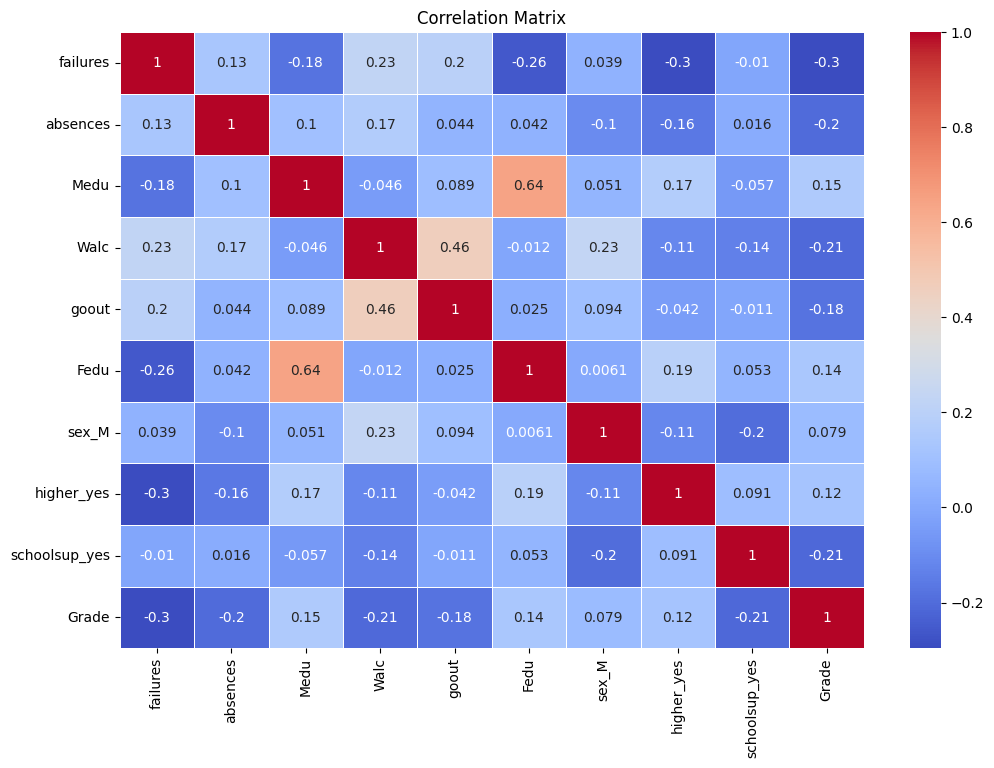

In [ ]:
numeric_cols = df_nor.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_nor[numeric_cols].corr()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

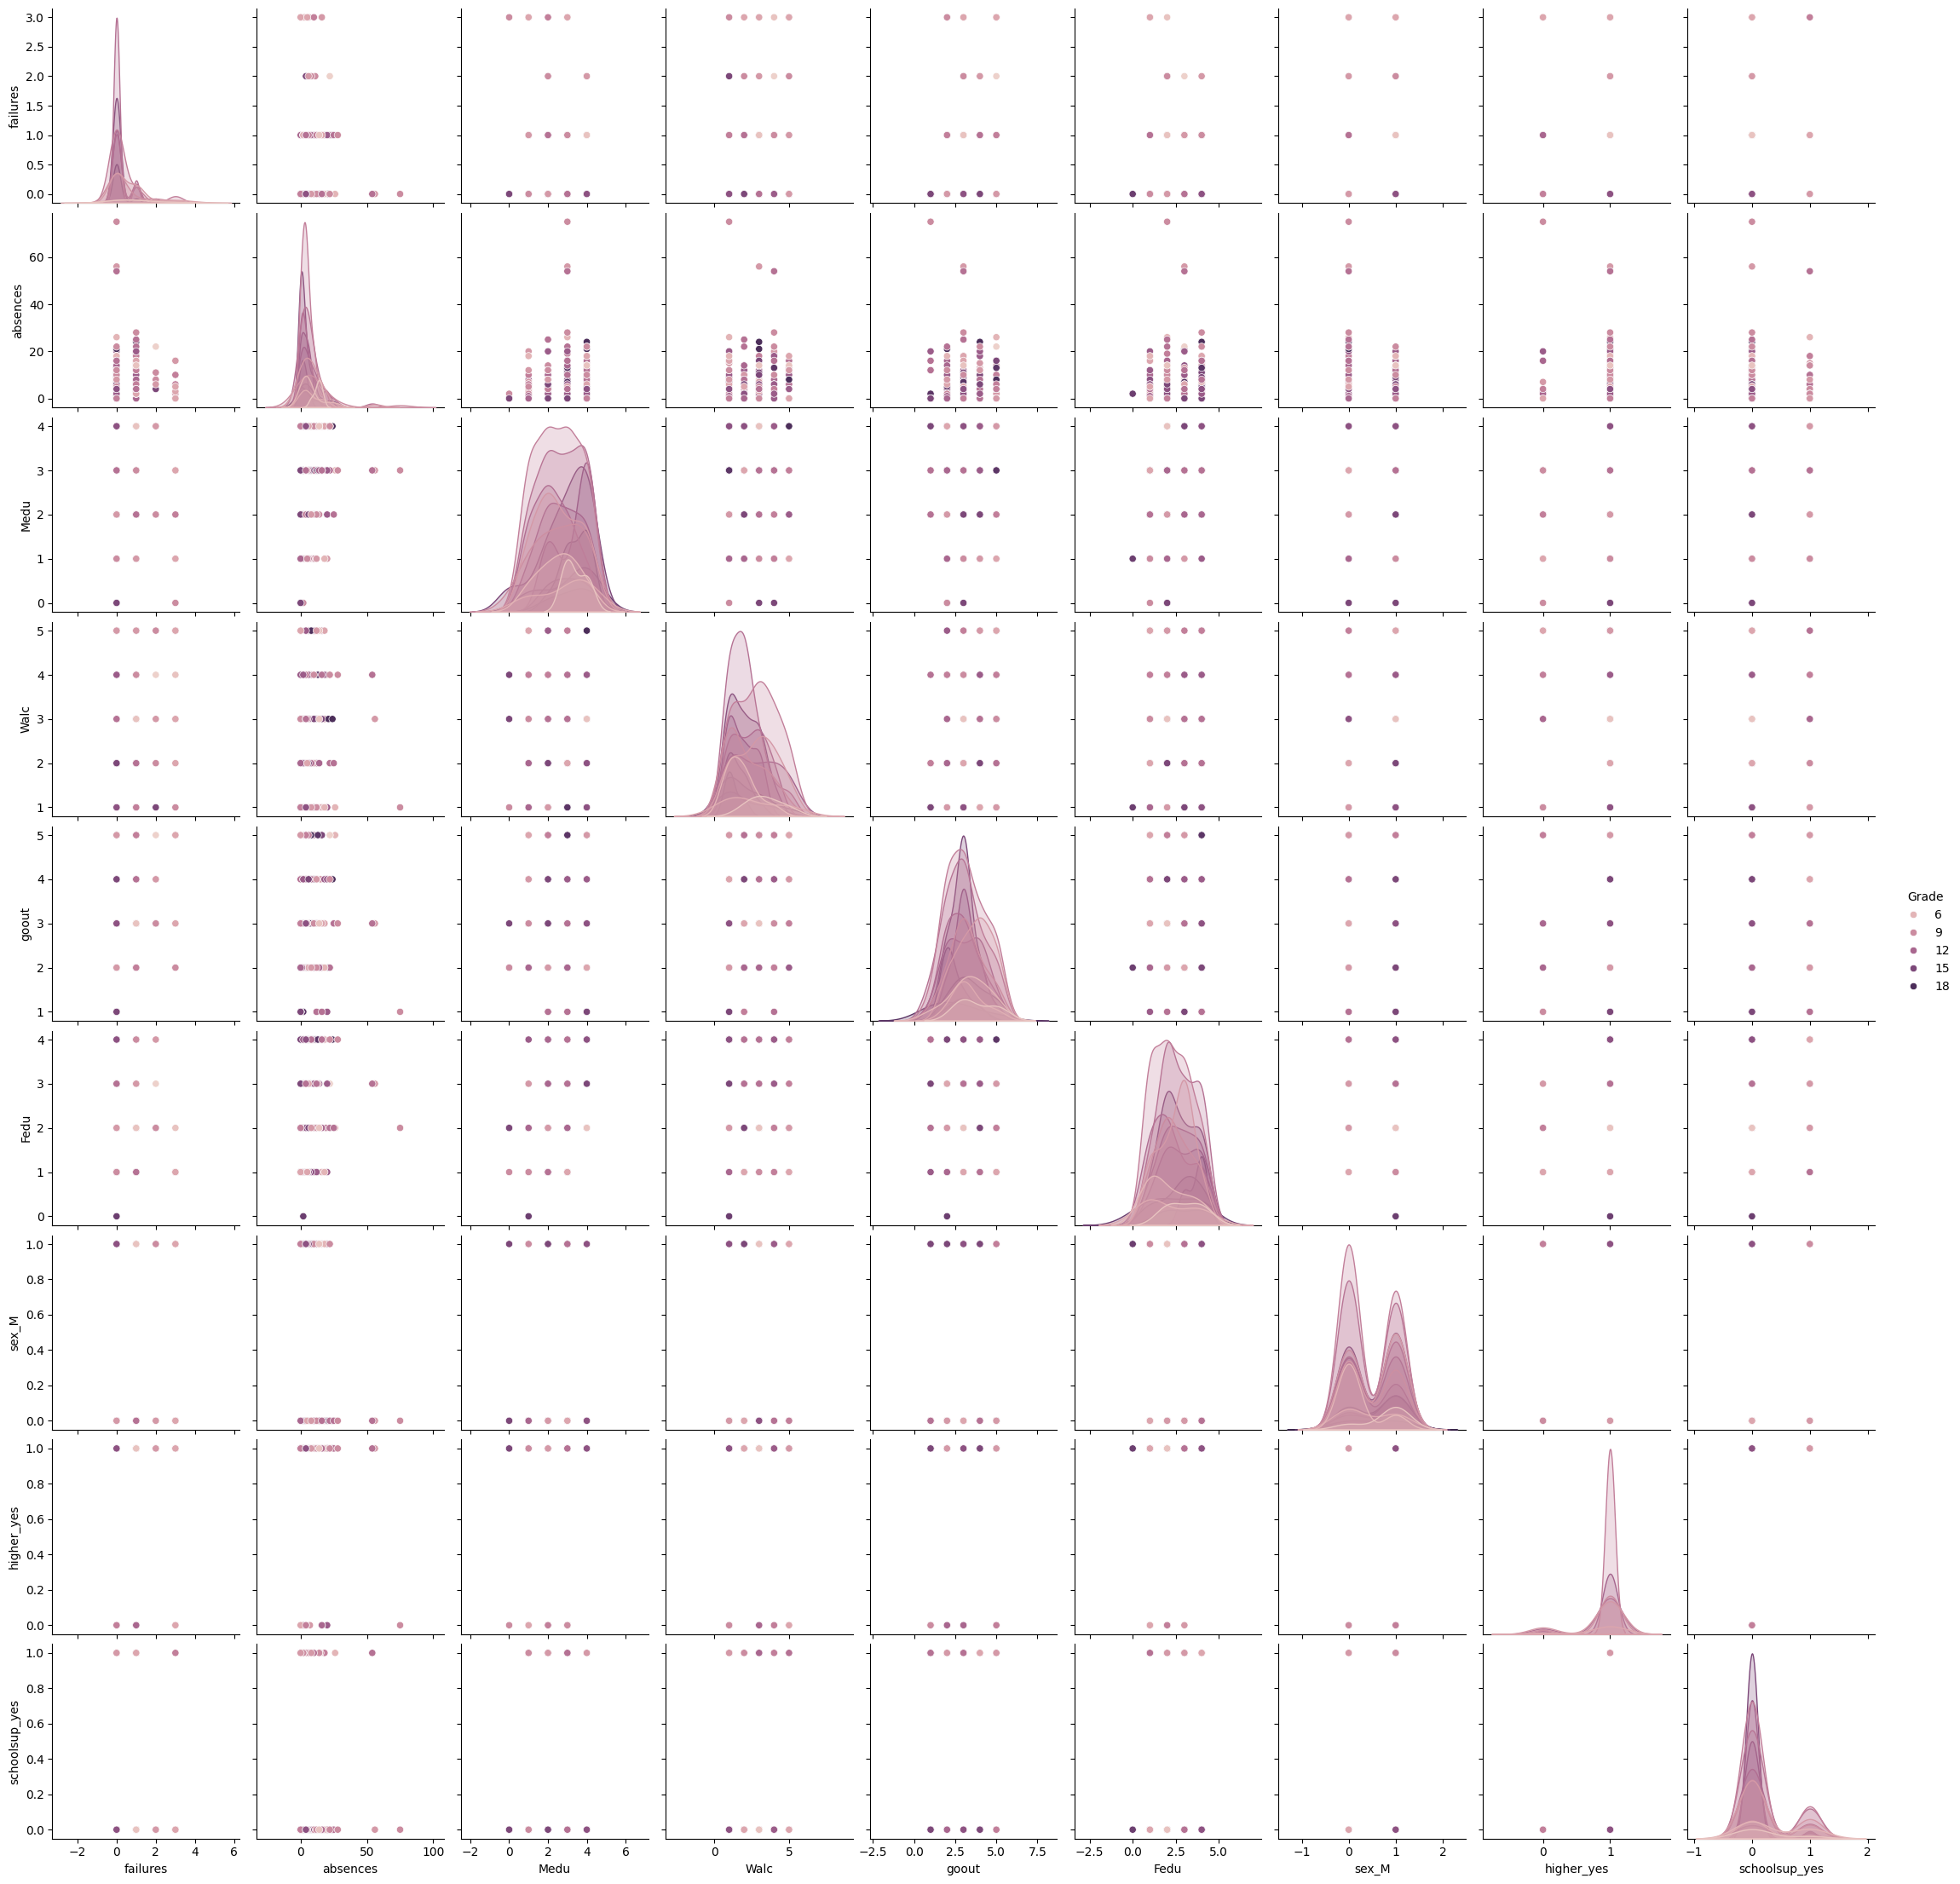

In [ ]:
sns.pairplot(df_nor,hue='Grade')

In [ ]:
from scipy.stats import shapiro, kstest, anderson, skew, kurtosis, norm
import statsmodels.api as sm

In [ ]:
variables = df_nor.columns.tolist()

In [ ]:
variables.remove('Grade')

In [ ]:
variables

['failures',
 'absences',
 'Medu',
 'Walc',
 'goout',
 'Fedu',
 'sex_M',
 'higher_yes',
 'schoolsup_yes']

In [ ]:
def test(data):
  result = {}
  for var in data.columns:
    shapiro_p = shapiro(data[var])[1]
    ks_p = kstest(data[var], 'norm',args=(data[var].mean(), data[var].std()))[1]
    ad_result = anderson(data[var],'norm')
    ad_stat = ad_result.statistic
    ad_crit = ad_result.critical_values[2]
    ad_sig = ad_stat > ad_crit

    result[var] = {
        'Shapiro-Wilk': 'Yes' if shapiro_p > 0.05 else 'No',
        'Kolmogorov-Smirnov': 'Yes' if ks_p > 0.05 else 'No',
        'Anderson-Darling': 'Yes' if not ad_sig else 'No'
    }
  return pd.DataFrame(result).T

In [ ]:
result = test(df_nor[variables])
print(result)
#Նորմալ բաշխումից չէ

              Shapiro-Wilk Kolmogorov-Smirnov Anderson-Darling
failures                No                 No               No
absences                No                 No               No
Medu                    No                 No               No
Walc                    No                 No               No
goout                   No                 No               No
Fedu                    No                 No               No
sex_M                   No                 No               No
higher_yes              No                 No               No
schoolsup_yes           No                 No               No


#Հիմնական բաղադրիչների վերլուծություն

Explained variance by each component: [0.21597378 0.18249631]


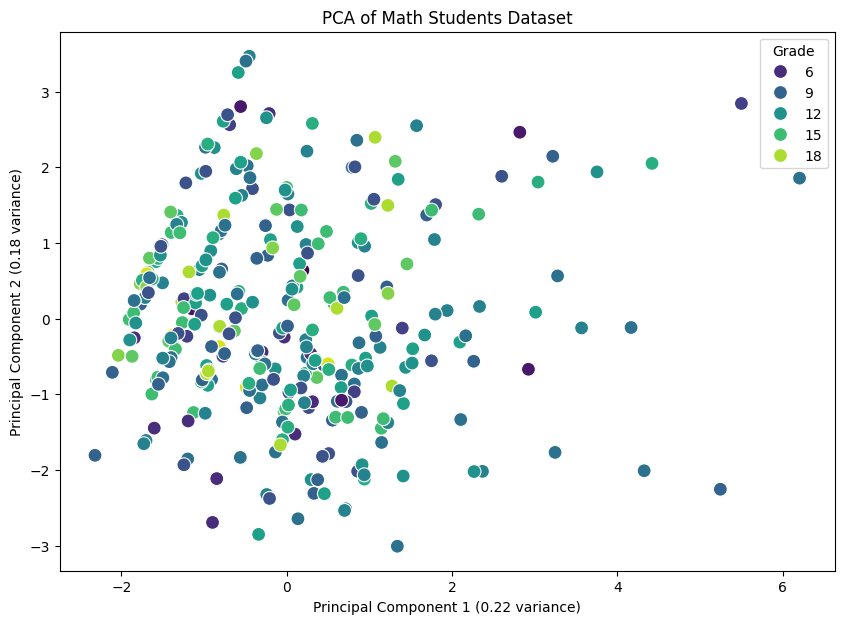

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Grade'] = y

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

# Plot the projection of data onto the first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Grade', palette='viridis', s=100)
plt.title('PCA of Math Students Dataset')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f} variance)')
plt.show()


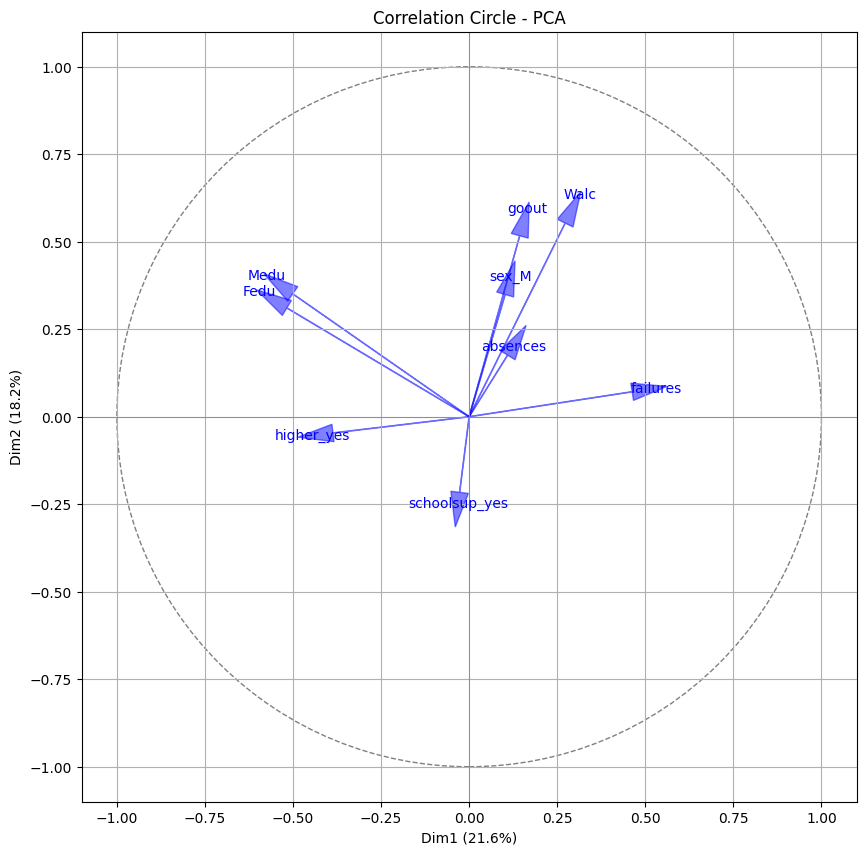

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Get PCA components
components = pca.components_

# Create the correlation circle plot
plt.figure(figsize=(10, 10))
# Plot the unit circle
circle = plt.Circle((0, 0), 1, color='grey', fill=False, linestyle='--')
plt.gca().add_artist(circle)

for i, feature in enumerate(X.columns):
    plt.arrow(0, 0, components[0, i], components[1, i], color='blue', alpha=0.5, head_width=0.05, head_length=0.1)
    plt.text(components[0, i] * 1.15, components[1, i] * 1.15, feature, color='blue', ha='center', va='center')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlabel(f'Dim1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'Dim2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Correlation Circle - PCA')
plt.grid()
plt.show()

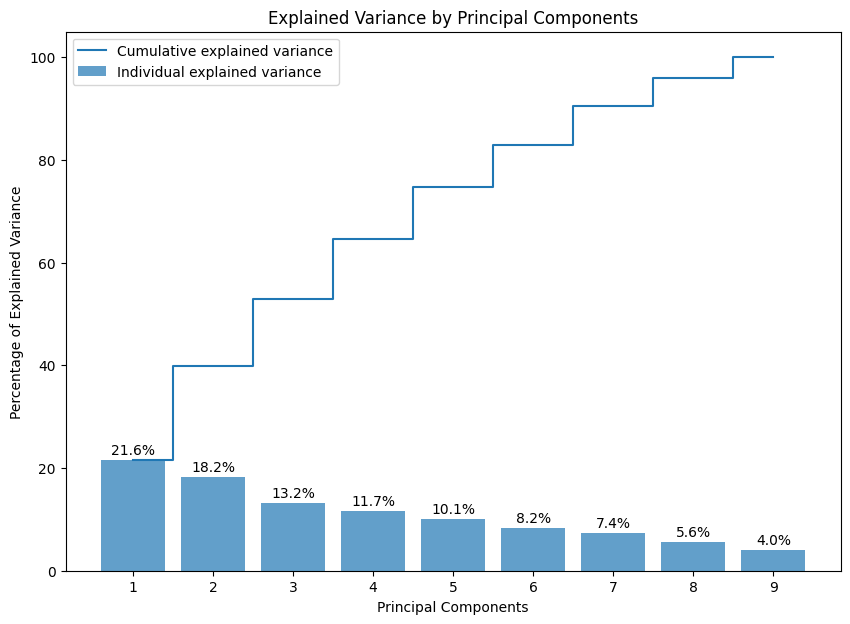

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=9)
principal_components = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_ * 100
cumulative_explained_variance = explained_variance.cumsum()

# Plot the explained variance
plt.figure(figsize=(10, 7))
bars = plt.bar(range(1, 10), explained_variance, alpha=0.7, align='center', label='Individual explained variance')

# Add percentage labels on each bar
for bar, variance in zip(bars, explained_variance):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{variance:.1f}%', ha='center', va='bottom')

plt.step(range(1, 10), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained Variance')
plt.xticks(ticks=range(1, 10), labels=[f'{i}' for i in range(1, 10)])
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()
